## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
filepath = '../datasets/diamonds/diamonds.csv'

In [3]:
import pandas as pd

# Load the dataset
diamonds = pd.read_csv(filepath)


## Exploring the Data

### Basic Stadistics

In [22]:
diamonds.head()

carat        cut color clarity  depth  table  price     x     y     z
0   1.10      Ideal     H     SI2   62.0   55.0   4733  6.61  6.65  4.11
1   1.29      Ideal     H     SI1   62.6   56.0   6424  6.96  6.93  4.35
2   1.20    Premium     I     SI1   61.1   58.0   5510  6.88  6.80  4.18
3   1.50      Ideal     F     SI1   60.9   56.0   8770  7.43  7.36  4.50
4   0.90  Very Good     F     VS2   61.7   57.0   4493  6.17  6.21  3.82

In [23]:
# Examine data types, missing values, and basic summary statistics
print(diamonds.info())
print(diamonds.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    5000 non-null   float64
 1   cut      5000 non-null   object 
 2   color    5000 non-null   object 
 3   clarity  5000 non-null   object 
 4   depth    5000 non-null   float64
 5   table    5000 non-null   float64
 6   price    5000 non-null   int64  
 7   x        5000 non-null   float64
 8   y        5000 non-null   float64
 9   z        5000 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 390.8+ KB
None
             carat        depth        table        price            x   
count  5000.000000  5000.000000  5000.000000   5000.00000  5000.000000  \
mean      0.794486    61.711660    57.447060   3925.53940     5.725188   
std       0.468424     1.446206     2.258999   3975.45212     1.119156   
min       0.230000    44.000000    51.600000     -1.00000     0.000000  

From the above it can be appreciated that there is no missing values in the dataset.

### Univariable Analysis

After importing the dataset and checking for missing values, I will continue with an univariable analysis. In this step, I will:

+ Explore the distribution of the target variable (diamond prices) through a histogram.
+ Analyze the distribution of each feature using histograms or kernel density plots. In this sense, I should consider that there features that are numeric ( depth, table, x, y, z, carat) and categorical ( clarity, color, cut)
+ As I'm analyzing features values distributions, I will generate box plots and scatter plots to identify _outliers_.

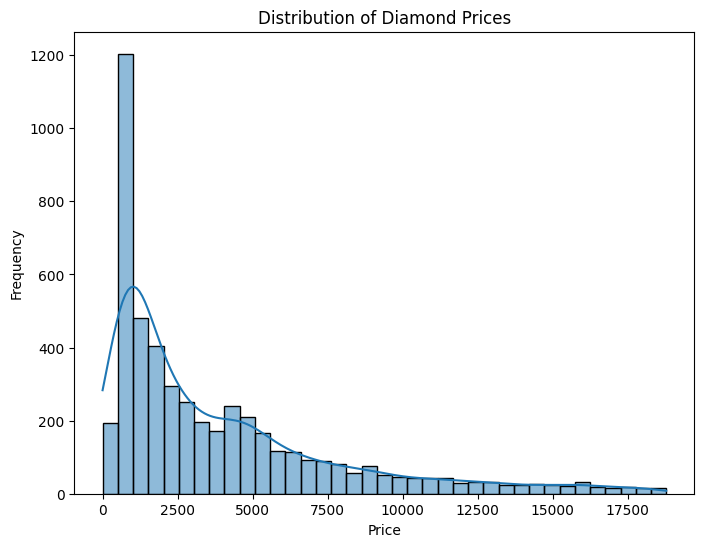

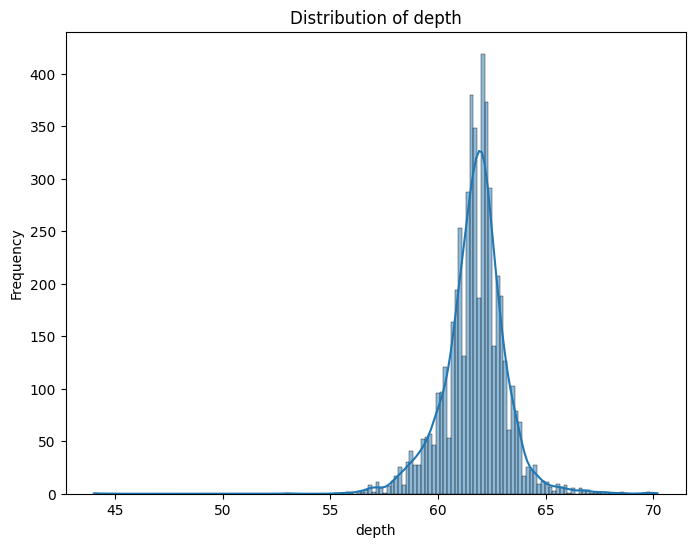

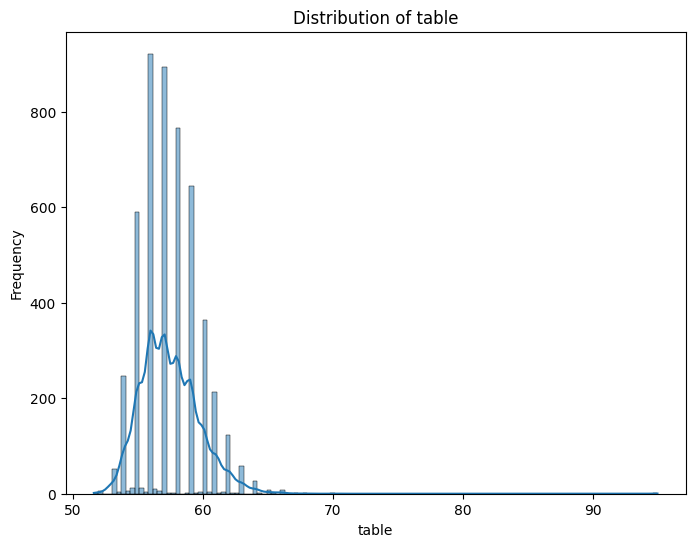

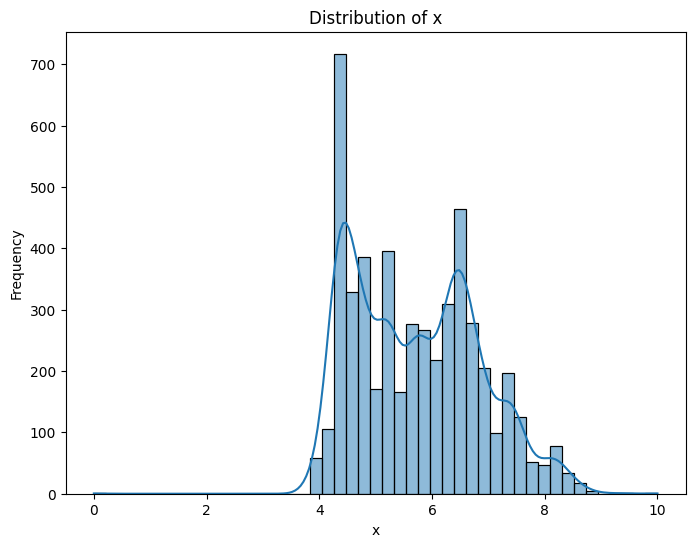

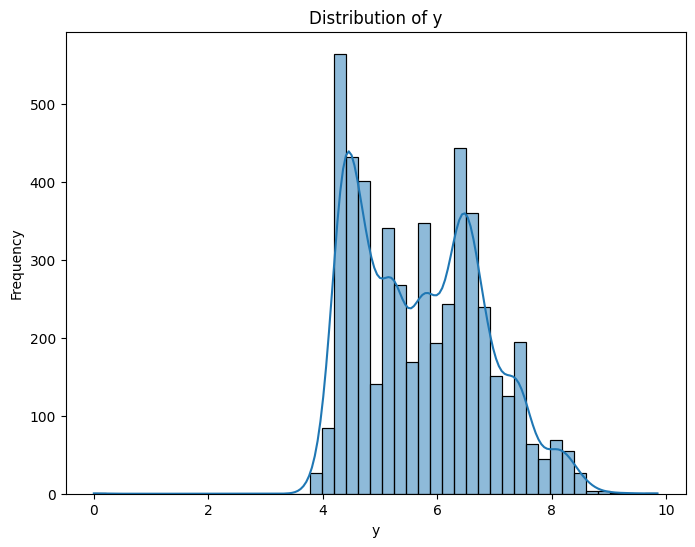

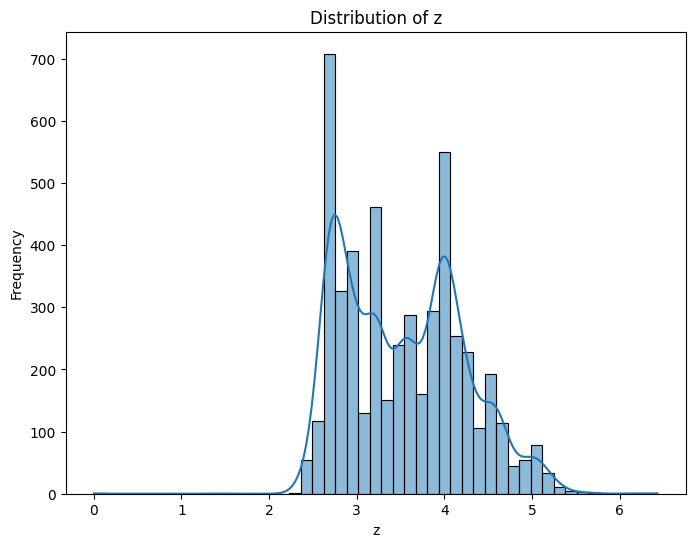

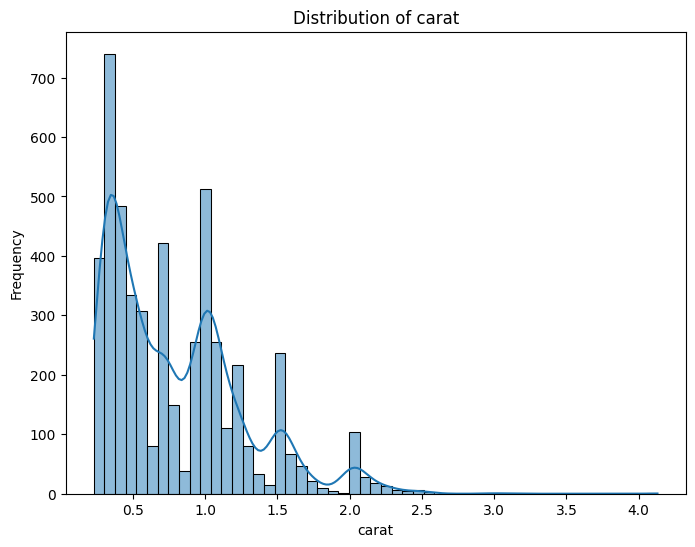

In [6]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# ==================================================
# Univariable Analysis
# ==================================================

# Explore the distribution of the target variable (diamond prices)
plt.figure(figsize=(8,6))
sns.histplot(data=diamonds, x="price", kde=True)
plt.title('Distribution of Diamond Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Analyze the distribution of each numeric feature
numeric_features = ['depth', 'table', 'x', 'y', 'z', 'carat']
for feature in numeric_features:
    plt.figure(figsize=(8,6))
    sns.histplot(data=diamonds, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


From the above there are some observations that can be made:

Regarding the Numeric Features:

+ Price and Carat present distributions fairly Rayleight
+ Depth and Table present distributions farily Gaussian



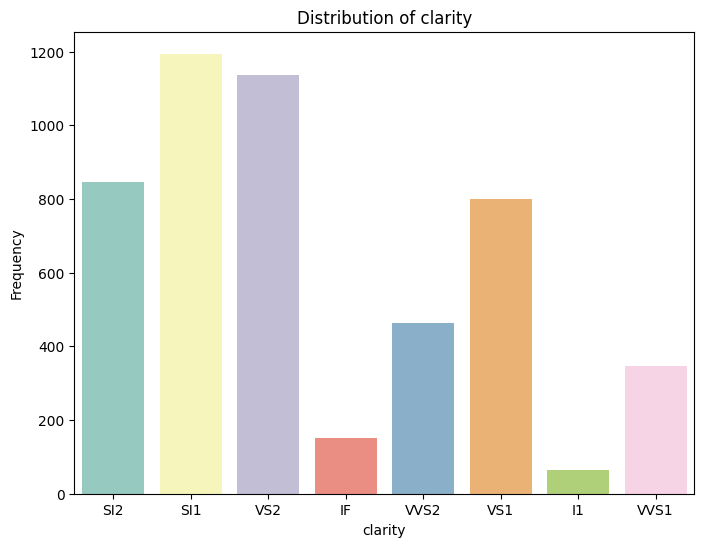

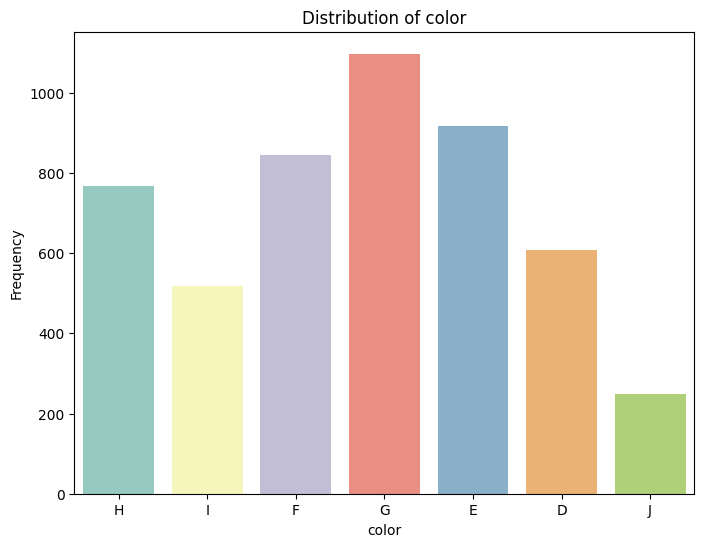

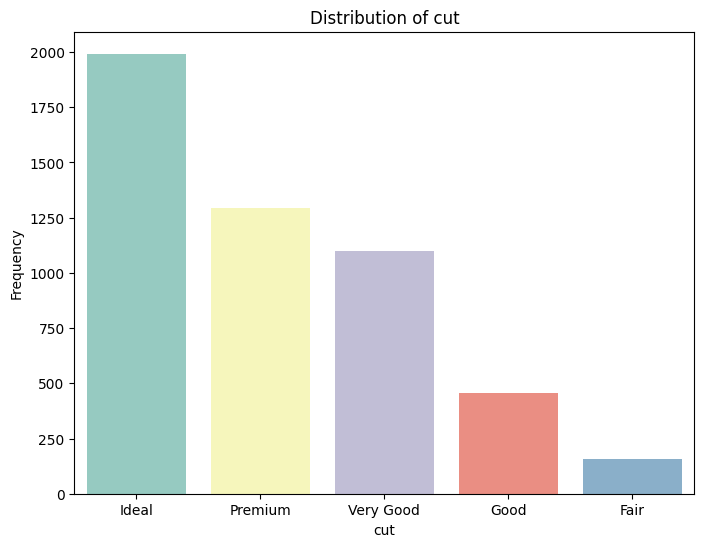

In [9]:
# Analyze the distribution of each categorical feature
categorical_features = ['clarity', 'color', 'cut']
for feature in categorical_features:
    plt.figure(figsize=(8,6))
    sns.countplot(x=diamonds[feature], palette='Set3' )
    plt.title(f'Distribution of {feature}')
    plt.xlabel(f'{feature}')
    plt.ylabel('Frequency')
    plt.show()

Regarding the categorical features it can be appreciated that:
+ Most Diamonds have an appropriate Cut quality
+ All diamonds are Colorless or Near Colorless in an approximately equal proportion.
+ Many diamonds have a high clarity quality (I1 and SI1).

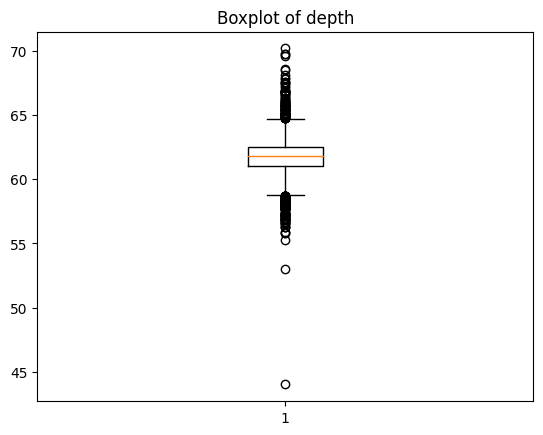

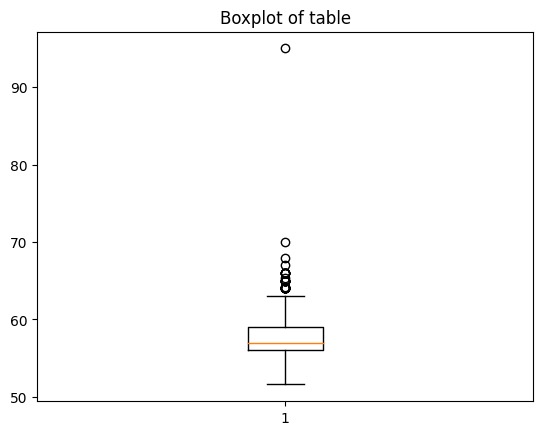

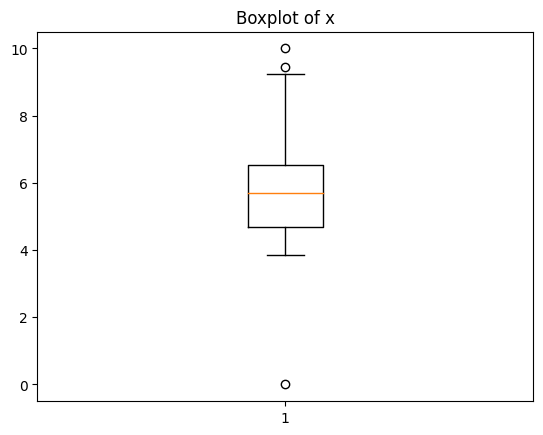

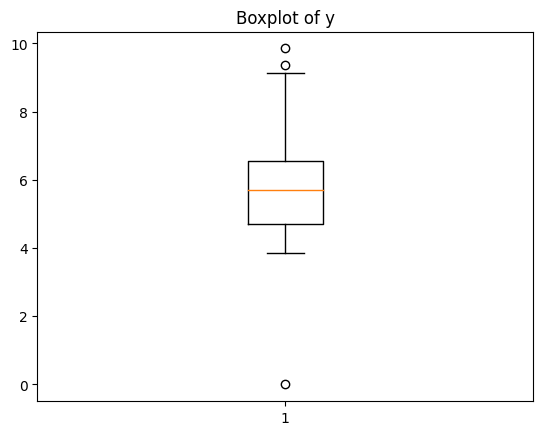

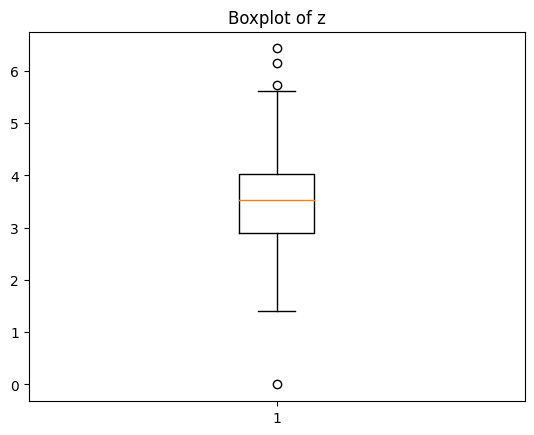

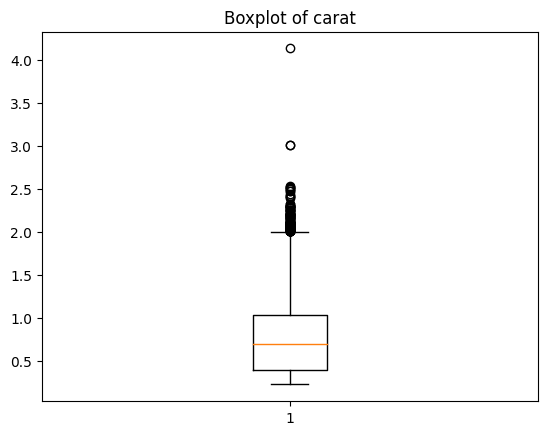

In [11]:
# Box plots for numeric features
for feature in numeric_features:
    plt.figure()
    plt.boxplot(diamonds[feature])
    plt.title('Boxplot of {}'.format(feature))


In [12]:
# Handle Outliers
# Define the conditions for removing outliers
conditions = [
    (diamonds['carat'] > 0) & (diamonds['price'] < 100),
    (diamonds['z'] > 2) & (diamonds['price'] < 100),
    (diamonds['z'] < 2),
    (diamonds['y'] > 3) & (diamonds['price'] < 100),
    (diamonds['y'] < 2),
    (diamonds['x'] > 2) & (diamonds['price'] < 100),
    (diamonds['x'] < 2),
    (diamonds['table'] > 75),
    (diamonds['depth'] < 50)
]

# Create a mask for the rows to be removed
mask = np.any(conditions, axis=0)

# Drop the rows that meet the conditions
diamonds = diamonds[~mask]

# Save the cleaned dataset
filepath = '../datasets/diamonds/'
diamonds.to_csv(filepath + 'diamonds_clean.csv', index=False)

diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4986 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    4986 non-null   float64
 1   cut      4986 non-null   object 
 2   color    4986 non-null   object 
 3   clarity  4986 non-null   object 
 4   depth    4986 non-null   float64
 5   table    4986 non-null   float64
 6   price    4986 non-null   int64  
 7   x        4986 non-null   float64
 8   y        4986 non-null   float64
 9   z        4986 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 428.5+ KB


### Bivariable Analysis

Now I will focus on bivariable analysis going through the following aspects.

+ Evaluate the correlation between numeric features and the target variable(price).
+ Use scatter plots and correlation matrices to visualize their relationships. 
+ Explore how categorical features (cut, color, clarity) impact diamond prices.
+ It should be also analyze if there is leakage between the input features, to determine if there are redundant features.

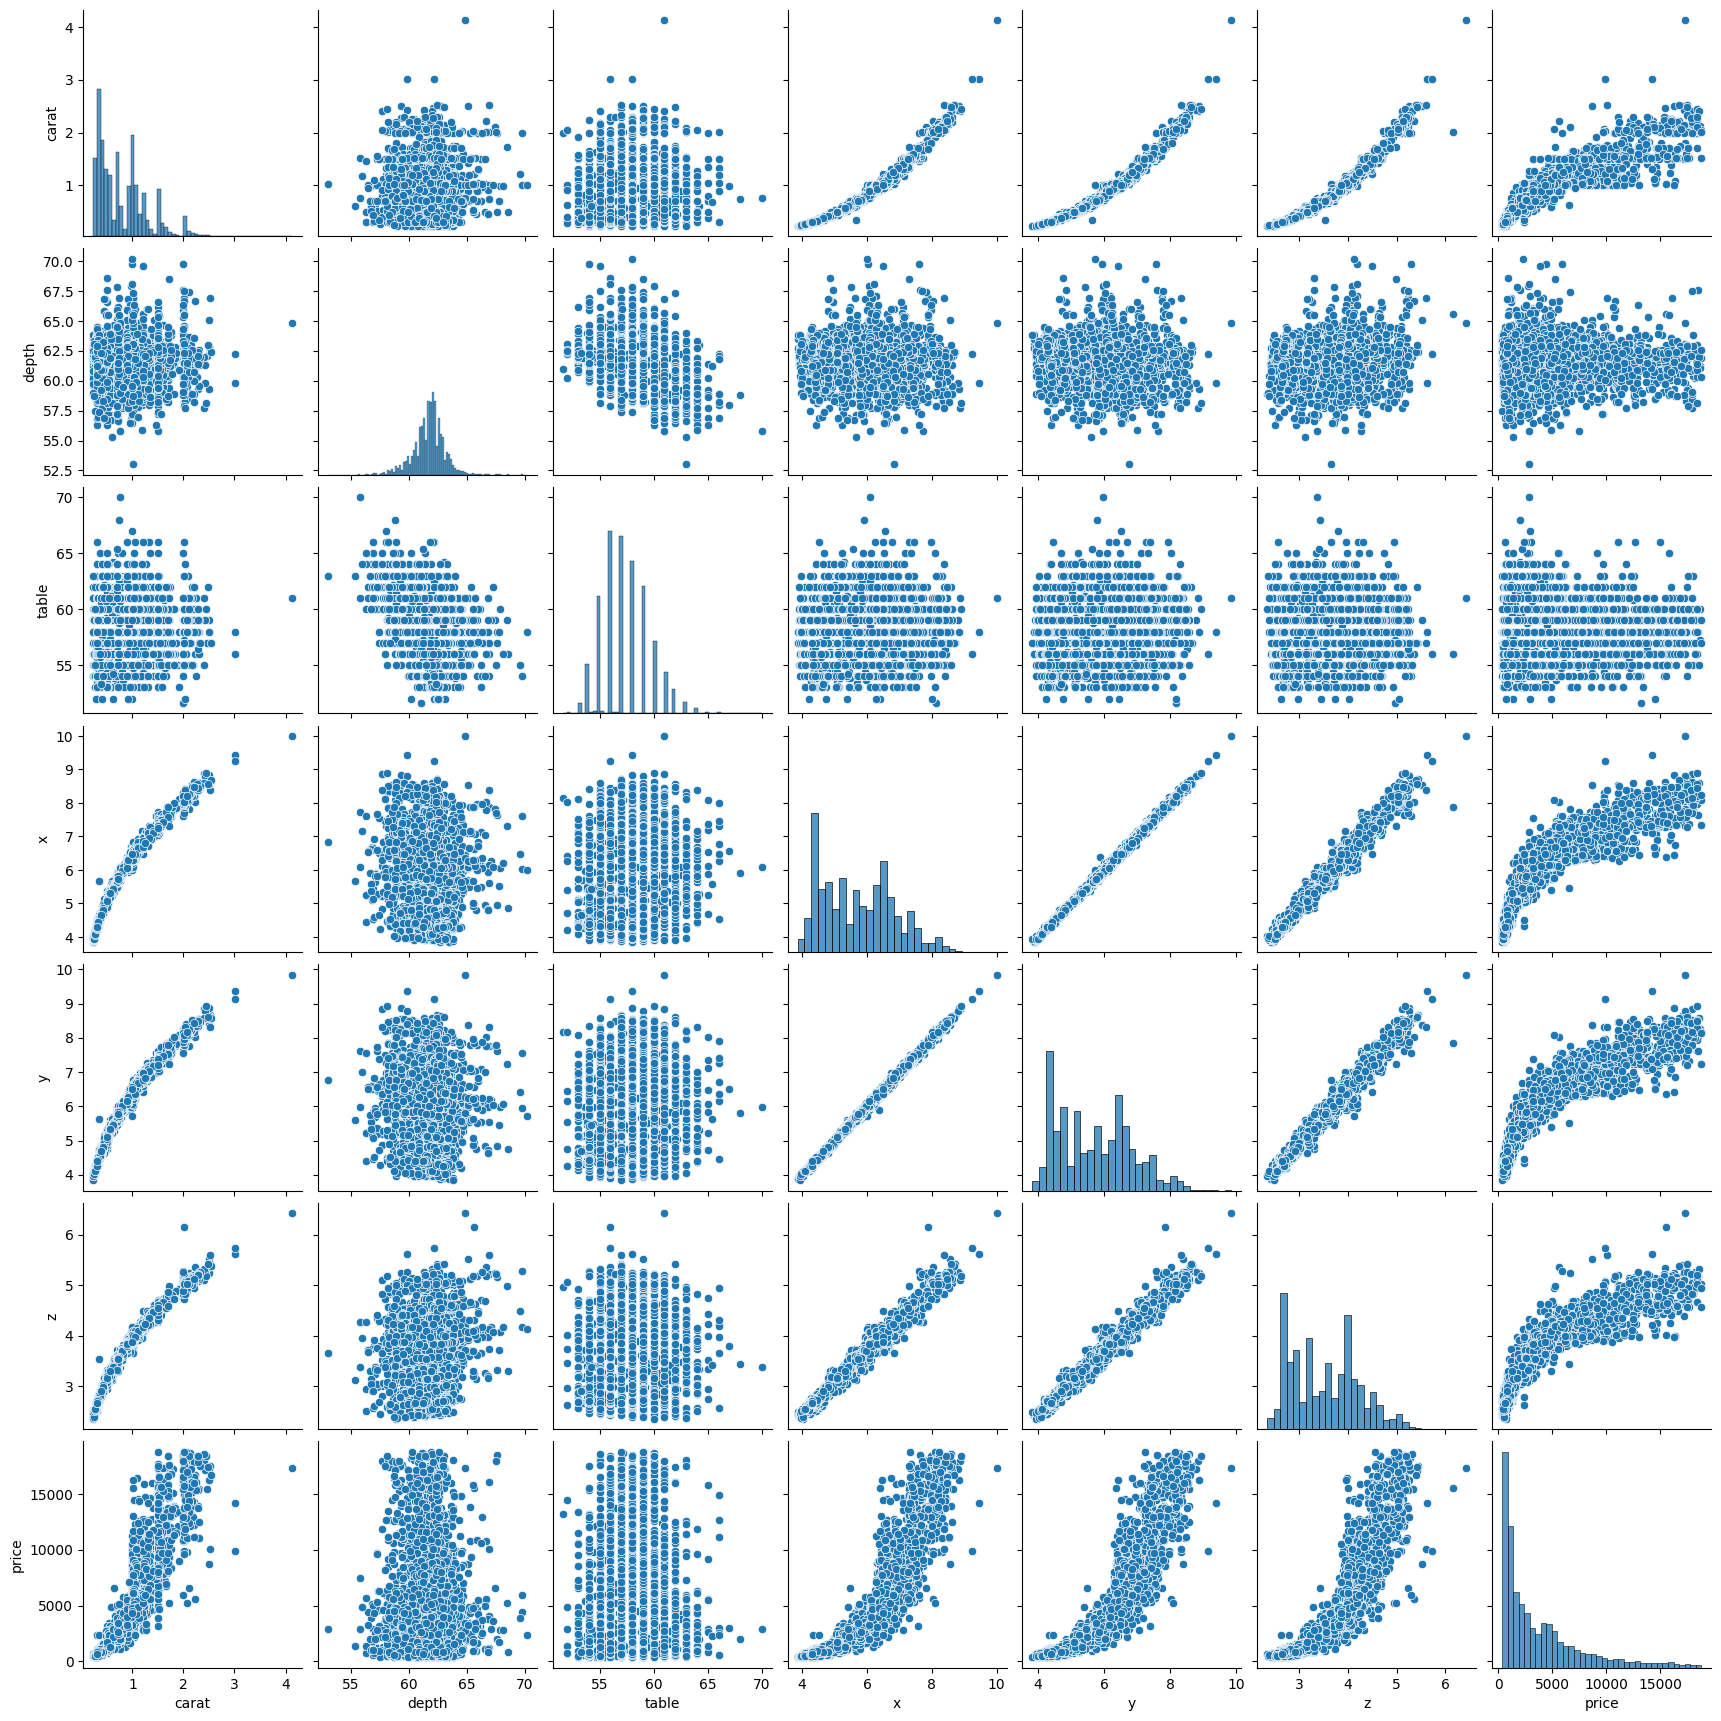

In [16]:
# Create a scatter plot matrix to visualize the relationships between numeric features
sns.pairplot(diamonds[['carat', 'depth', 'table', 'x', 'y', 'z', 'price']])
plt.show()

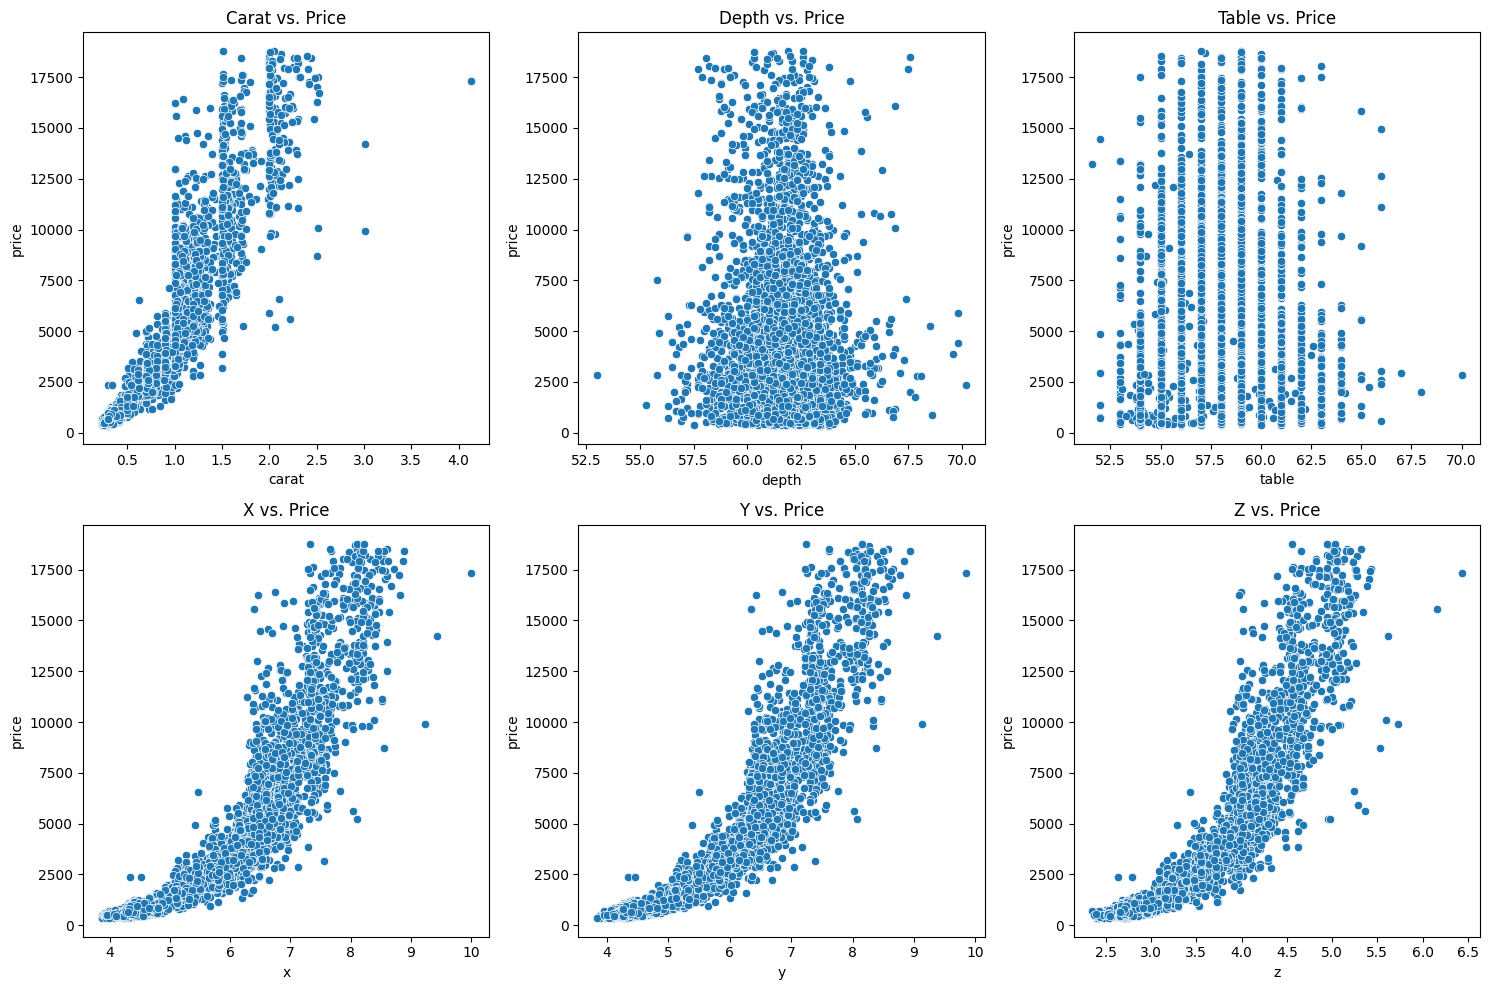

In [13]:
# Scatter plots for numeric features against the target variable (price)
numeric_features = ['carat', 'depth', 'table', 'x', 'y', 'z']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features, start=1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=feature, y='price', data=diamonds)
    plt.title(f'{feature.capitalize()} vs. Price')

plt.tight_layout()
plt.show()

From the above it can be stated that:
+ Depth and table seems to have low correlation with the price of the diamond
+ X, Y and Z have a correlation with the price which seems to be a exponential type relation.
+ Carat presents a fairly linear relation with the Price.

Let's have a second input from the correlation between features:

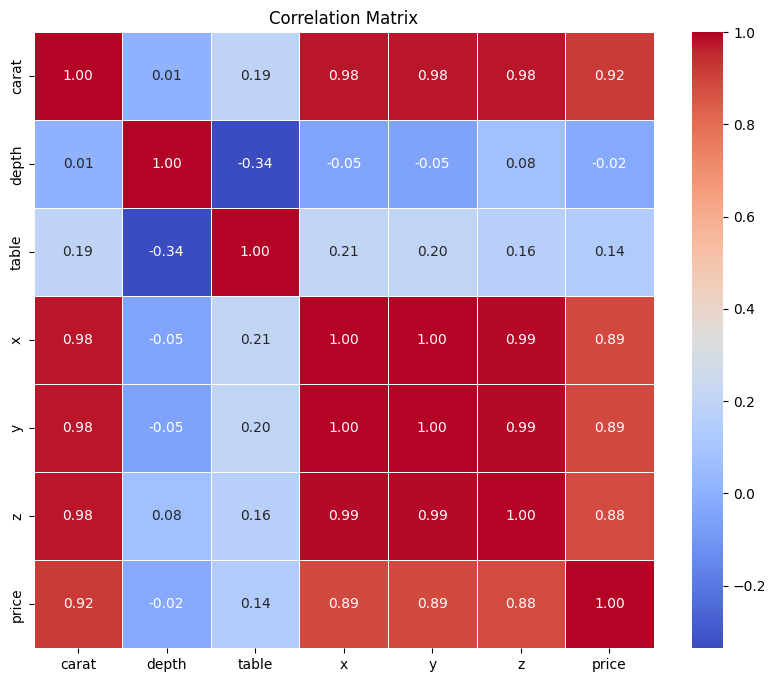

In [14]:
# Correlation matrix to evaluate relationships between numeric features
correlation_matrix = diamonds[numeric_features + ['price']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Interpretation of Correlation Matrix for Numeric Features:

- **Positive Correlation:**
  - A positive correlation close to 1 indicates that as one variable increases, the other tends to increase as well.
  - For example, if 'carat' has a high positive correlation with 'price,' it suggests that heavier diamonds generally have higher prices.

- **Negative Correlation:**
  - A negative correlation close to -1 implies an inverse relationship. As one variable increases, the other tends to decrease.
  - If 'depth' has a high negative correlation with 'price,' it means deeper diamonds may have lower prices.

- **Correlation Strength:**
  - The color intensity in the heatmap reflects the strength of the correlation. Darker colors (close to 1 or -1) indicate stronger correlations.

- **Multicollinearity:**
  - High correlations between numeric features. If two features have a very high positive correlation, they might provide redundant information.

From the matrix be can appreciate that:
+ Depth and Table are farly correlated with the price
+ Carat, x, y and z are highly correlated among them and with the price. So probably there is an underneath direct correlation among them.

Interpretation of Box Plots for Categorical Features:

1. **Cut vs. Price:**
   - The box plot shows the distribution of diamond prices for different cut qualities (Fair, Good, Very Good, Premium, Ideal).
   - The box represents the interquartile range (IQR), with the middle line inside the box indicating the median price.
   - Whiskers extend to the minimum and maximum prices within 1.5 times the IQR.
   - Outliers may be represented as individual points beyond the whiskers.

2. **Color vs. Price:**
   - Displays the distribution of prices for different color grades (D, E, F, G, H, I, J).
   - Interpretation similar to the "Cut vs. Price" box plot.

3. **Clarity vs. Price:**
   - Illustrates the distribution of prices based on clarity grades (IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1).
   - Higher-priced diamonds may have higher clarity grades, affecting the median and spread.

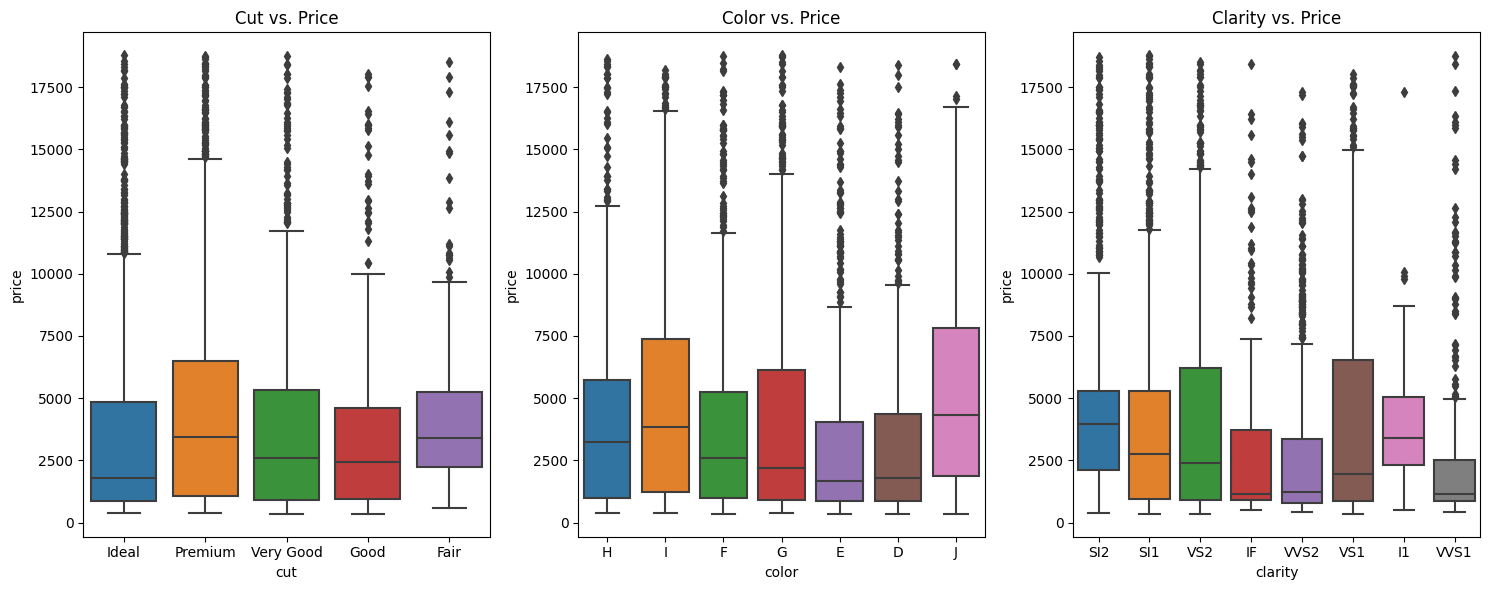

In [15]:
# Box plots for categorical features against the target variable (price)
categorical_features = ['cut', 'color', 'clarity']
plt.figure(figsize=(15, 6))
for i, feature in enumerate(categorical_features, start=1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=feature, y='price', data=diamonds)
    plt.title(f'{feature.capitalize()} vs. Price')

plt.tight_layout()
plt.show()

From the above graph it can be stated that:
+ The Cut quality does not have a big impact on the price
+ The Color is more relevant, being the J and I color clases the more expensive ones.
+ The Clarity is also a very relevant feature, being the more expensive ones I1 and SI2 and the less expensive ones IF, WS1 and WS2.

### Multivariable analysis

The aim of this section is to investigate interactions between multiple features and their impact on diamond prices, I will focus on the following feature pairs and create specific plots to gain insights:

### Feature Pairs:

1. **Carat vs. Cut:**
   - Create a scatter plot with 'carat' on the x-axis, 'price' on the y-axis, and use different colors or markers for each cut category.
   - Observe how the relationship between carat and price varies across different cut qualities.

2. **Carat vs. Color:**
   - Similar to the carat-cut plot, create a scatter plot with 'carat' on the x-axis, 'price' on the y-axis, and color markers based on different color grades.

3. **Carat vs. Clarity:**
   - Explore the impact of carat size on price with a scatter plot, using colors or markers to represent different clarity grades.

4. **Depth vs. Table:**
   - Investigate the relationship between 'depth' and 'table' with a scatter plot.
   - Consider including 'price' as a color gradient or marker size to observe the impact on prices.

5. **Carat vs. Dimensions (x, y, z):**
   - Create scatter plots to visualize how carat size relates to the dimensions of the diamond.
   - Use different colors or markers to indicate the impact on prices.

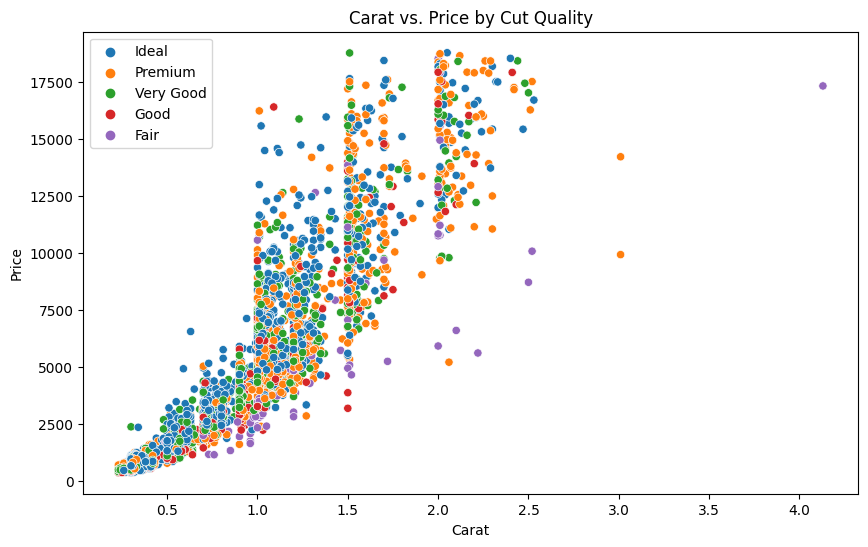

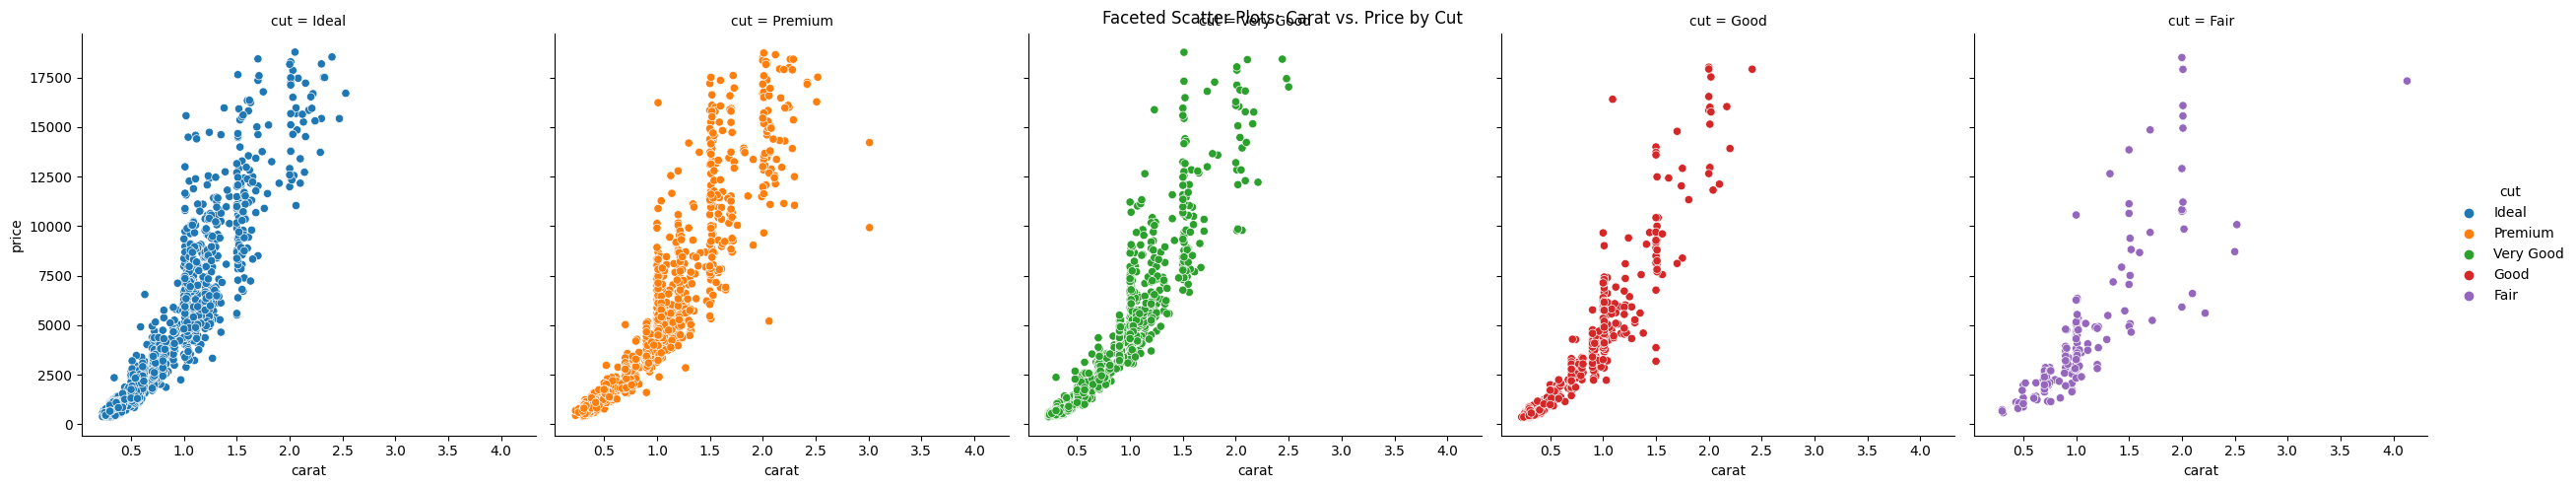

In [17]:
# 1. Carat vs. Cut
plt.figure(figsize=(10, 6))
sns.scatterplot(x='carat', y='price', hue='cut', data=diamonds)
plt.title('Carat vs. Price by Cut Quality')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.legend()
plt.show()

# 1.1 Faceted scatter plots for Categorical Features
sns.relplot(x='carat', y='price', hue='cut', col='cut', data=diamonds, kind='scatter')
plt.suptitle('Faceted Scatter Plots: Carat vs. Price by Cut')
plt.show()

From the above it can be stated that:

_"as the quality of the cut increases, the price scales faster with the carat"_

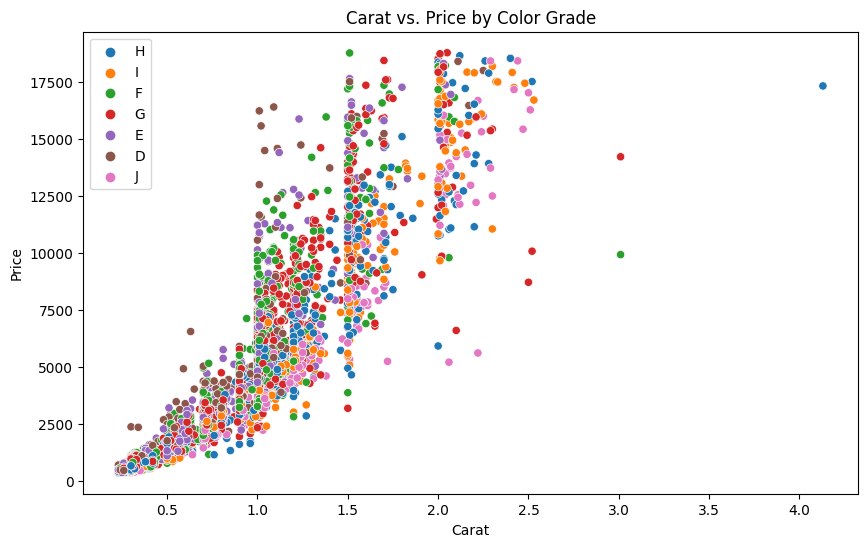

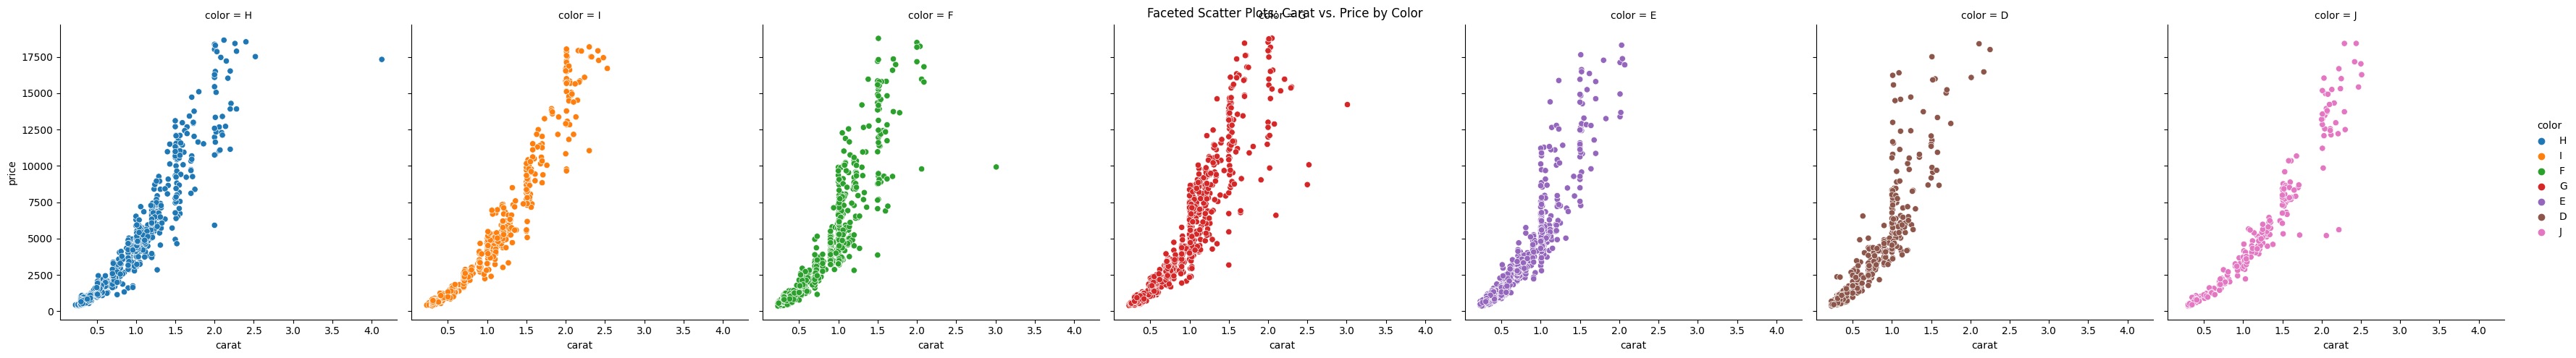

In [18]:
# 2. Carat vs. Color
plt.figure(figsize=(10, 6))
sns.scatterplot(x='carat', y='price', hue='color', data=diamonds)
plt.title('Carat vs. Price by Color Grade')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.legend()
plt.show()

# 2.1 Faceted scatter plots for Categorical Features
sns.relplot(x='carat', y='price', hue='color', col='color', data=diamonds, kind='scatter')
plt.suptitle('Faceted Scatter Plots: Carat vs. Price by Color')
plt.show()

As was mentioned earlier, the color does not have an appreciable impact on the price and it's variations.

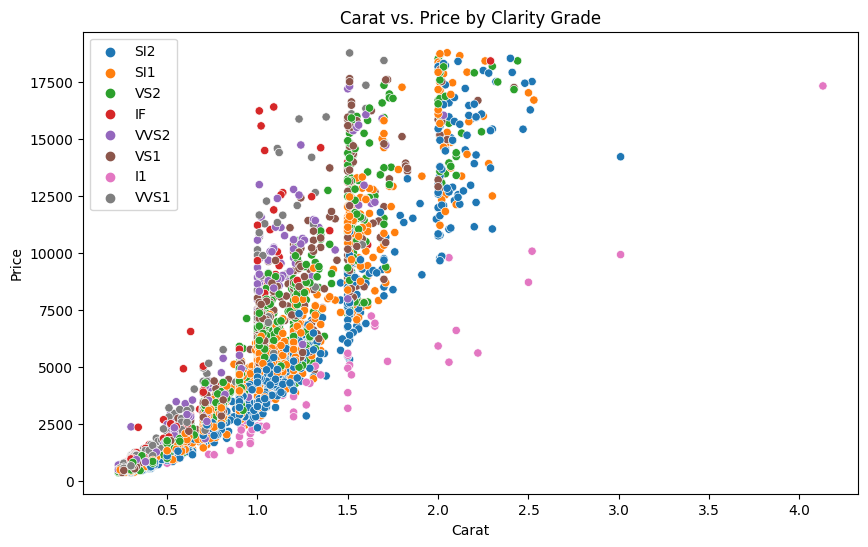

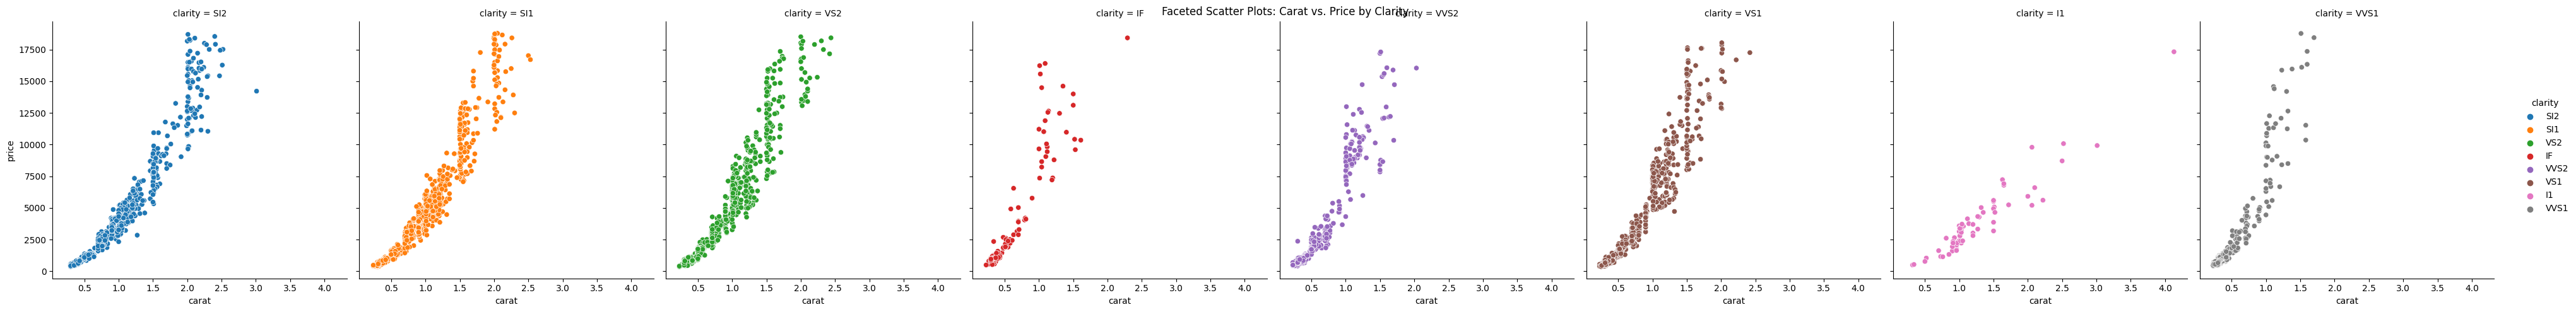

In [19]:
# 3. Carat vs. Clarity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='carat', y='price', hue='clarity', data=diamonds)
plt.title('Carat vs. Price by Clarity Grade')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.legend()
plt.show()

# 3.1 Faceted scatter plots for Categorical Features
sns.relplot(x='carat', y='price', hue='clarity', col='clarity', data=diamonds, kind='scatter')
plt.suptitle('Faceted Scatter Plots: Carat vs. Price by Clarity')
plt.show()

This plot reinforces the observations made regarding which Clarity categories are more and less valuable.

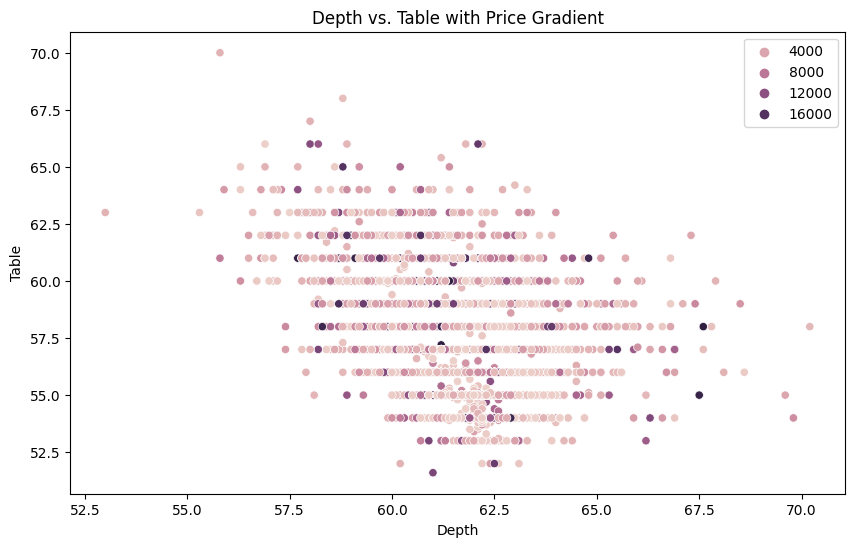

In [20]:
# 4. Depth vs. Table
plt.figure(figsize=(10, 6))
sns.scatterplot(x='depth', y='table', hue='price', data=diamonds)
plt.title('Depth vs. Table with Price Gradient')
plt.xlabel('Depth')
plt.ylabel('Table')
plt.legend()
plt.show()

Even with this multivarible graph, there is no obvious relation between depth, table and the price. 

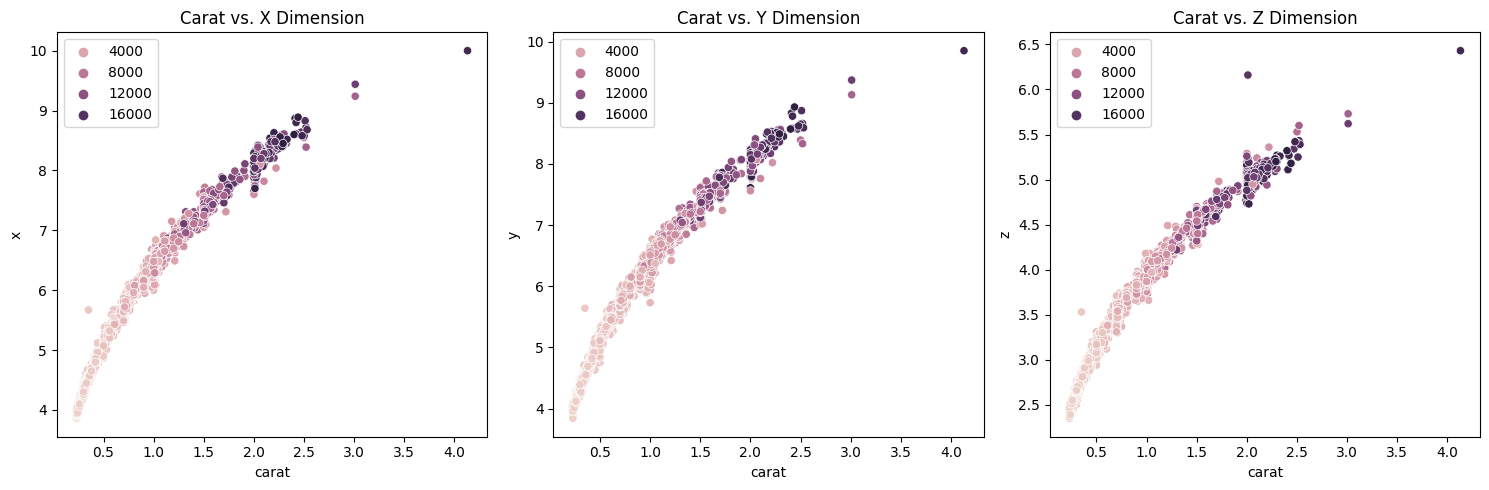

In [21]:

# 5. Carat vs. Dimensions (x, y, z)
# Create subplots for each dimension
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Carat vs. x
sns.scatterplot(x='carat', y='x', hue='price', data=diamonds, ax=axes[0])
axes[0].set_title('Carat vs. X Dimension')
axes[0].legend()

# Carat vs. y
sns.scatterplot(x='carat', y='y', hue='price', data=diamonds, ax=axes[1])
axes[1].set_title('Carat vs. Y Dimension')
axes[1].legend()

# Carat vs. z
sns.scatterplot(x='carat', y='z', hue='price', data=diamonds, ax=axes[2])
axes[2].set_title('Carat vs. Z Dimension')
axes[2].legend()

plt.tight_layout()
plt.show()

Again, there is a high positive correlation between the dimentions of the diamond, it's weight and the price.

### Feature Engineering

In this section, I will go thought creating new features that might enhance predictive power.

In first place I will to get the volume of the diamond based on the other dimentions. The formula is as follows for this features:
```python

df['beta'] = df['depth']/100

df['alpha'] = (1 - df['beta'] ) * (1 + (df['table']/100)**2 )


df['volume'] = 0.5 * df['z'] * df['x'] * df['y'] * (df['alpha'] + df['beta'])
```
where _beta_ and _alpha_ are auxiliary columns which are dropped after calculating the _volume_ of the diamond.

After getting the diamond's volume, a feature related to the density must be calculated as:
```python
df['density'] = df['carat'] / df['volume]
```

Other features can be craft, such as **Symmetry Index**, but as **x** and **y** are so highly correlated, I consider that feature will not add much to the analysis.

In [22]:

# Calculate the beta and alpha values
diamonds['beta'] = diamonds['depth'] / 100
diamonds['alpha'] = (1 - diamonds['beta']) * (1 + (diamonds['table'] / 100)**2)

# Calculate the volume of the diamond
diamonds['volume'] = 0.5 * diamonds['z'] * diamonds['x'] * diamonds['y'] * (diamonds['alpha'] + diamonds['beta'])

# Calculate the density of the diamond
diamonds['density'] = diamonds['carat'] / diamonds['volume']

# Drop the auxiliary columns
diamonds.drop(['beta', 'alpha'], axis=1, inplace=True)


In [23]:
diamonds.head()

carat        cut color clarity  depth  table  price     x     y     z   
0   1.10      Ideal     H     SI2   62.0   55.0   4733  6.61  6.65  4.11  \
1   1.29      Ideal     H     SI1   62.6   56.0   6424  6.96  6.93  4.35   
2   1.20    Premium     I     SI1   61.1   58.0   5510  6.88  6.80  4.18   
3   1.50      Ideal     F     SI1   60.9   56.0   8770  7.43  7.36  4.50   
4   0.90  Very Good     F     VS2   61.7   57.0   4493  6.17  6.21  3.82   

       volume   density  
0  100.714111  0.010922  
1  117.210427  0.011006  
2  110.573823  0.010852  
3  138.127768  0.010860  
4   82.289636  0.010937

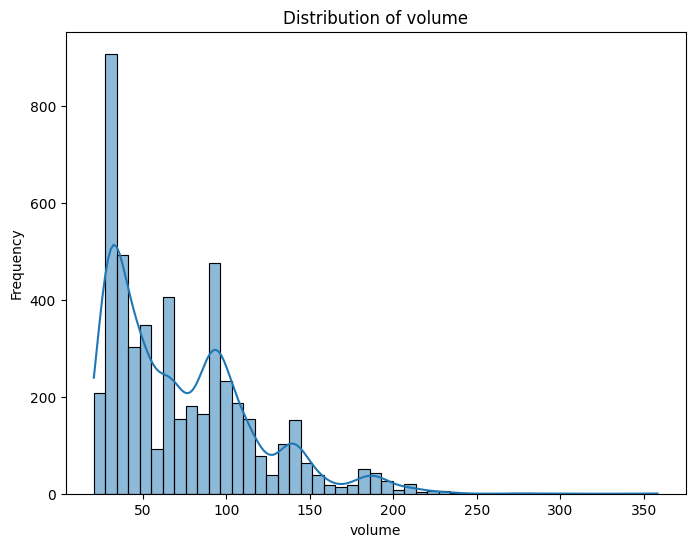

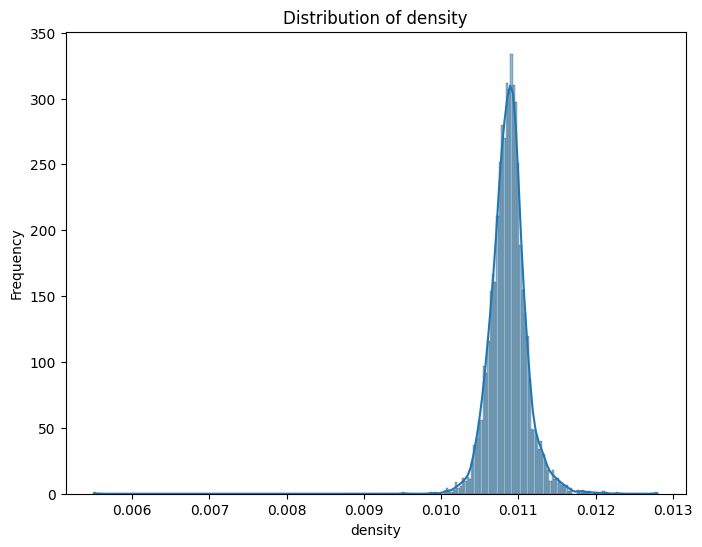

In [24]:
# Analyze the distribution of the new numeric feature
numeric_features = ['volume','density']
for feature in numeric_features:
    plt.figure(figsize=(8,6))
    sns.histplot(data=diamonds, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

From the above it can be seen that **the density of the diamonds is almost constant**.

This observation explains _why is the carat so highly correlated to the dimentions x,y and z?_ 

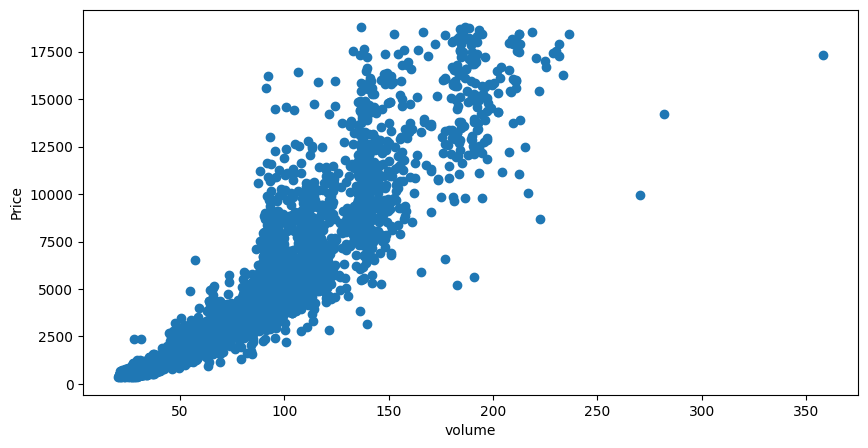

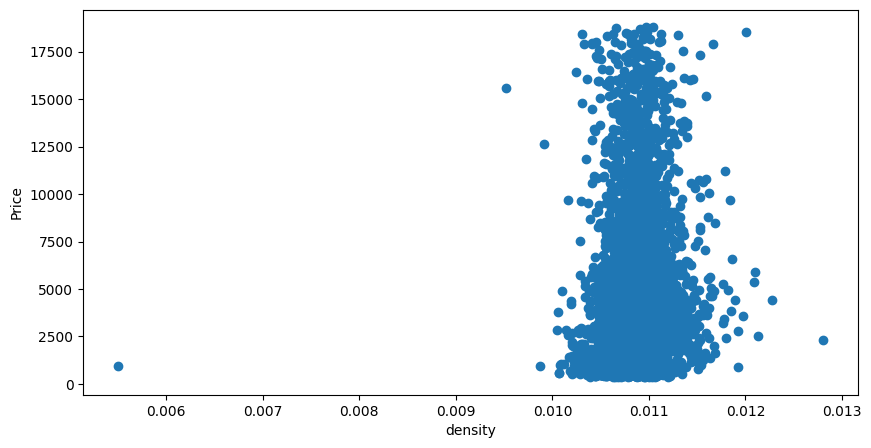

In [27]:
# Create scatter plots between numeric features and price
numeric_features = ['volume', 'density']
for feature in numeric_features:
    plt.figure(figsize=(10, 5))
    plt.scatter(diamonds[feature], diamonds['price'])
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()

This last plot allows to identify new outliers, which are diamonds with a density almost half of the mean one.

In [28]:

# Define the conditions for removing outliers
conditions = [
    
    (diamonds['density'] < 0.008)

]

# Create a mask for the rows to be removed
mask = np.any(conditions, axis=0)

# Drop the rows that meet the conditions
diamonds = diamonds[~mask]

# Save the cleaned dataset
#diamonds.to_csv('diamonds_cleaned.csv', index=False)

diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4985 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    4985 non-null   float64
 1   cut      4985 non-null   object 
 2   color    4985 non-null   object 
 3   clarity  4985 non-null   object 
 4   depth    4985 non-null   float64
 5   table    4985 non-null   float64
 6   price    4985 non-null   int64  
 7   x        4985 non-null   float64
 8   y        4985 non-null   float64
 9   z        4985 non-null   float64
 10  volume   4985 non-null   float64
 11  density  4985 non-null   float64
dtypes: float64(8), int64(1), object(3)
memory usage: 506.3+ KB


### Statistical Tests

Performing statistical tests can help validate the observed patterns and assess their significance. Here are some statistical tests you can consider based on the observed patterns:

1. **Correlation Test:**
   - Test the correlation between numeric features and the target variable (diamond prices). Pearson or Spearman correlation coefficients and assess statistical significance.

 
   The aim of the correlation test is to measure the strength and direction of the linear relationship between two variables.

   - The Pearson correlation coefficient measures the linear correlation between two variables. It takes values between -1 and 1, where:
   - A value of 1 indicates a perfect positive linear relationship (as one variable increases, the other variable also increases).
   - A value of -1 indicates a perfect negative linear relationship (as one variable increases, the other variable decreases).
   - A value of 0 indicates no linear relationship between the two variables.

   - The Spearman correlation coefficient is a non-parametric measure of the monotonic relationship between two variables. It is less sensitive to outliers than the Pearson correlation coefficient and does not require the data to be normally distributed. It takes values between -1 and 1, with the same interpretation as the Pearson correlation coefficient.

2. **Kruskal-Wallis Test:**
   - For categorical features (cut, color, clarity), perform the Kruskal-Wallis test assess if there are significant differences in diamond prices across different groups.

3. **T-test:**
   - To compare the means of two groups.

#### Correlation



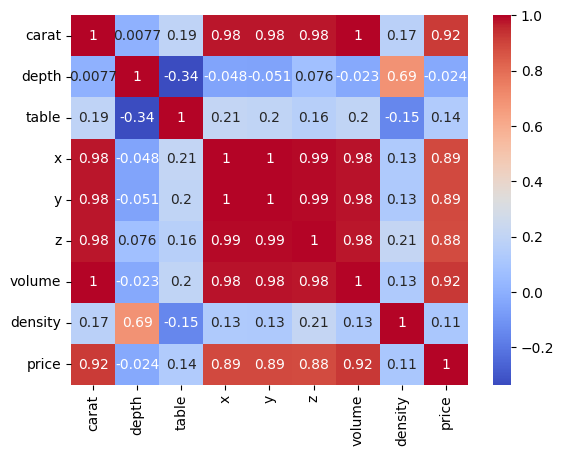

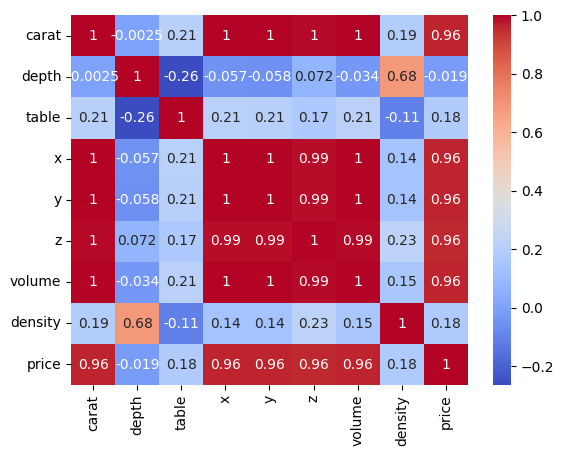

In [26]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import spearmanr


# Select the numeric features and the target variable
numeric_features = ['carat', 'depth', 'table', 'x', 'y', 'z', 'volume', 'density']
target_variable = diamonds['price']

# Calculate the correlation matrix using Pearson or Spearman correlation
pearson_corr = diamonds[numeric_features + ['price']].corr(method='pearson')  # Pearson correlation
spearman_corr = diamonds[numeric_features + ['price']].corr(method='spearman')  # Spearman correlation


# Visualize the Pearson correlation matrix
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm')
plt.show()
# Visualize the Spearman correlation matrix
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm')
plt.show()

From the above plots, it can be seen that:
+ X, y and Z are highly correlated to **Volume**
+ **Volume** is highly correlated to **carat**. **As the density is almost a constant value**. 
+ **Volume** could summarize the rows x,y and z, and has high correlation with the price.

#### Kruskal-Wallis 

   The Kruskal-Wallis test is a non-parametric test used to compare the medians of two or more independent groups. Conditions to check:

   a. Independent Samples: The samples for each group should be independent of each other.
   b. Ordinal Data: The dependent variable should be measured on an ordinal scale or at least have an ordinal interpretation.
   c. Homogeneity of Variance: The variances of the groups should be roughly equal.
   d. Similar Shape of Distributions: The shapes of the distributions within each group should be similar.




In [31]:
import pandas as pd
import numpy as np
from scipy.stats import kruskal, f_oneway
from sklearn.preprocessing import LabelEncoder


# Perform statistical tests on the categorical features
categorical_features = ['cut', 'color', 'clarity']
for feature in categorical_features:
    print(f'Statistical tests for {feature}:')
    print('-' * 40)

    # Encode the categorical feature
    encoder = LabelEncoder()
    encoded_feature = encoder.fit_transform(diamonds[feature])

    # Perform Kruskal-Wallis test
    _, kruskal_p_value = kruskal(encoded_feature, diamonds['price'])
    print(f'Kruskal-Wallis test p-value: {kruskal_p_value}')
    if kruskal_p_value < 0.05:
        print('Reject null hypothesis, significant differences in diamond prices across different groups.')
    else:
        print('Fail to reject null hypothesis, no significant differences in diamond prices across different groups.')


Statistical tests for cut:
----------------------------------------
Kruskal-Wallis test p-value: 0.0
Reject null hypothesis, significant differences in diamond prices across different groups.
Statistical tests for color:
----------------------------------------
Kruskal-Wallis test p-value: 0.0
Reject null hypothesis, significant differences in diamond prices across different groups.
Statistical tests for clarity:
----------------------------------------
Kruskal-Wallis test p-value: 0.0
Reject null hypothesis, significant differences in diamond prices across different groups.


According to the analysis the three categorical features **cut**, **clarity** and **color** present relevant differences in the main price, even though I was considering the color as less important.

#### T-test

In [32]:
import pandas as pd
from scipy.stats import ttest_ind


# Perform T-tests on the categorical features
categorical_features = ['cut', 'color', 'clarity']
for feature in categorical_features:
    print(f'T-test for {feature}:')
    print('-' * 40)

    # Get unique categories of the feature
    categories = diamonds[feature].unique()

    # Counter for rejection of null hypothesis
    rejection_counter = 0
    case_counter = 0

    # Perform T-test for each pair of categories
    for i in range(len(categories)):
        for j in range(i + 1, len(categories)):
            category1 = categories[i]
            category2 = categories[j]
            case_counter += 1

            # Extract the prices for the two categories
            prices_category1 = diamonds[diamonds[feature] == category1]['price']
            prices_category2 = diamonds[diamonds[feature] == category2]['price']

            # Perform T-test
            t_statistic, p_value = ttest_ind(prices_category1, prices_category2, equal_var=False)

            # Print the results
            print(f'Test for {category1} vs {category2}:')
            print(f'T-statistic: {t_statistic}')
            print(f'p-value: {p_value}')
            if p_value < 0.05:
                print('Reject null hypothesis, significant difference in mean prices.')
                rejection_counter += 1
            else:
                print('Fail to reject null hypothesis, no significant difference in mean prices.')
            print('\n')

    # Print the count of rejections for the feature
    print(f'Rejections in {feature}: {rejection_counter} over {case_counter} cases considered \n')

T-test for cut:
----------------------------------------
Test for Ideal vs Premium:
T-statistic: -8.450660932743418
p-value: 4.9338889480238175e-17
Reject null hypothesis, significant difference in mean prices.


Test for Ideal vs Very Good:
T-statistic: -2.916765869997796
p-value: 0.0035709932062482374
Reject null hypothesis, significant difference in mean prices.


Test for Ideal vs Good:
T-statistic: -0.8091774050139922
p-value: 0.41868704569749515
Fail to reject null hypothesis, no significant difference in mean prices.


Test for Ideal vs Fair:
T-statistic: -3.897738763525831
p-value: 0.00013684455836279874
Reject null hypothesis, significant difference in mean prices.


Test for Premium vs Very Good:
T-statistic: 5.185859910845342
p-value: 2.331313200061639e-07
Reject null hypothesis, significant difference in mean prices.


Test for Premium vs Good:
T-statistic: 5.346792113897771
p-value: 1.1126290802079591e-07
Reject null hypothesis, significant difference in mean prices.


Tes

The T-test also agrees that all the categorical features are relevant to predict the price of the diamond.

## Conclusions

In order to predict the value of a diamond the following aspects are crucial:

+ The mass or **carat** of the diamond is the more relevant feature
+ The **volume** of the diamond is highly correlated to the carat as the density of a diamond is almost constant.
+ Diamonds with a *clarity* **IF1, SW1 and SW2** are the more expensive ones
+ As the quality of the *cut* increases, the price scales faster with the carat.
+ Diamonds with *color* categories **I** and **J** are the most expensive ones.